# 5. Diseño e implementación de modelos y técnicas predictivas

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.feature_selection import f_regression, mutual_info_regression #metodos de filtrado de caracteristicas
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor

import joblib # guardar modelos entrenados

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
datos = pd.read_csv("vehiclesMOD.csv", header=0,sep=",")
datos.head(3)

,price_k,age,odometer_k,title_status,condition_num,cc,type,fuel,transmission,drive,paint_color,state,dim_region
0,30.99,5,41.124,clean,4,8,pickup,gas,other,4wd,red,al,M / S
1,27.99,10,68.696,clean,4,8,pickup,gas,other,4wd,black,al,M / S
2,35.00,3,43.000,clean,5,6,truck,gas,automatic,4wd,grey,al,M / S


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103283 entries, 0 to 103282
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price_k        103283 non-null  float64
 1   age            103283 non-null  int64  
 2   odometer_k     103283 non-null  float64
 3   title_status   103283 non-null  object 
 4   condition_num  103283 non-null  int64  
 5   cc             103283 non-null  int64  
 6   type           103283 non-null  object 
 7   fuel           103283 non-null  object 
 8   transmission   103283 non-null  object 
 9   drive          103283 non-null  object 
 10  paint_color    103283 non-null  object 
 11  state          103283 non-null  object 
 12  dim_region     103283 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 10.2+ MB


In [ ]:
datos["transmission"].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [ ]:
datos["title_status"].unique()

array(['clean', 'clear', 'salvage', 'rebuilt', 'lien', 'missing'],
      dtype=object)

###  5.1.1. Codificacion

In [ ]:
datosCod = pd.get_dummies(datos,prefix={
       'title_status':'title_status',
       'type':'type',
       'fuel':'fuel',
       'transmission':'transmission',
       'drive':'drive',
       'paint_color':'paint_color',
       'state':'state',
       'dim_region':'dim_region'},
       drop_first=False)

In [ ]:
datosCod.head(3)

,price_k,age,odometer_k,condition_num,cc,title_status_clean,title_status_clear,title_status_lien,title_status_missing,title_status_rebuilt,...,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,dim_region_L,dim_region_M / S,dim_region_XL
0,30.99,5,41.124,4,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,27.99,10,68.696,4,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,35.00,3,43.000,5,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
datosCod.iloc[:,30:35].head(3)

,fuel_other,transmission_automatic,transmission_manual,transmission_other,drive_4wd
0,0,0,0,1,1
1,0,0,0,1,1
2,0,1,0,0,1


### 5.1.2. Paso a narray

In [ ]:
X = datosCod.iloc[:, 1:].values
y = datosCod.iloc[:, 0].values
#Xcuanti = datosCod.iloc[:, 1:5].values
#Xcuali  = datosCod.iloc[:, 5:].values
#y       = datosCod.iloc[:, 0].values

### 5.1.3. Escalado variables numericas

In [ ]:
for i in range(4):
  scaler2 = StandardScaler()
  X[:,[i]] = scaler2.fit_transform(X[:,i].reshape(-1,1))
X
#scaler1 = StandardScaler()
#Xscaled = scaler1.fit_transform(Xcuanti)
#print(Xscaled)
#X = np.concatenate((Xscaled, Xcuali), axis = 1)
#print(X)

array([[-0.80349924, -0.7736417 , -0.02168918, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.15640124, -0.30633371, -0.02168918, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18745943, -0.74184605,  0.94139059, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.37943953, -1.39989407, -0.02168918, ...,  0.        ,
         1.        ,  0.        ],
       [-0.99547933, -0.96028016, -0.02168918, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18745943, -1.08563233, -0.02168918, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
y

array([30.99, 27.99, 35.  , ..., 34.99, 28.99, 30.59])

In [ ]:
X_names = datosCod.columns[1:]

In [ ]:
print(y.shape)
print(X.shape)

(103283,)
(103283, 104)


### 5.1.4. División del dataset

In [ ]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (82626, 104)
Datos test:  (20657, 104)


In [ ]:
print('Datos entrenamiento: ', y_train.shape)
print('Datos test: ', y_test.shape)

Datos entrenamiento:  (82626,)
Datos test:  (20657,)


In [ ]:
y_train[50]

4.988

In [ ]:
y_test[20656]

2.5

# 5.2. Modelos lineales

### 5.2.1. Modelo lineal con todas las variables

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True).fit(X_train,y_train)
lr.score(X_train,y_train) # no ejecutar de nuevo

0.6648590111634236

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(lr, 'lr_1.pkl') 

['lr_1.pkl']

In [ ]:
lr = joblib.load('lr_1.pkl') # Carga del modelo
lr.score(X_train,y_train)

0.6648590111634236

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([14.16404724,  8.20463562, 31.7384491 , ..., 20.61698914,
       19.39109802, -2.8651123 ])

In [ ]:
y_test

array([15.5  ,  2.   , 38.99 , ..., 17.995, 21.   ,  2.5  ])

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)

print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  51.680246109208476
R2:  0.665089246568154
MAPE:  102.58684667881155
sqrt(MSE):  7.188897419577531


Veamos los coeficientes

In [ ]:
w = lr.coef_
for noms, coefs in zip(X_names, w):
    print("coef " + noms + " : "+str(coefs))

coef age : -5.26947513335113
coef odometer_k : -3.481573448626643
coef condition_num : 0.0049542299763447595
coef cc : 2.230912974240323
coef title_status_clean : 11064456479.748104
coef title_status_clear : 11064456475.276245
coef title_status_lien : 11064456479.289045
coef title_status_missing : 11064456473.554218
coef title_status_rebuilt : 11064456475.523125
coef title_status_salvage : 11064456475.909986
coef type_SUV : 28615904174.65683
coef type_convertible : 28615904177.77843
coef type_coupe : 28615904175.238575
coef type_crossover : 28615904171.411663
coef type_hatchback : 28615904171.80361
coef type_micro : 28615904175.1945
coef type_minivan : 28615904175.148254
coef type_offroad : 28615904174.084335
coef type_other : 28615904177.114254
coef type_pickup : 28615904179.457573
coef type_roadster : 28615904179.978954
coef type_sedan : 28615904173.134167
coef type_truck : 28615904178.958645
coef type_van : 28615904175.768253
coef type_wagon : 28615904172.740864
coef fuel_diesel : -

In [ ]:
norm_lr = norm(w,2)
norm_lr

1104207064315.2654

Estamos viendo como los coeficientes de las variables binarias no tienen sentido. Prueba de ello son los que acompañan a la variable estado, vemos como el precio de la variable se ve incrementado en 9 billones de euros por pertenecer a cualquiera de los estados. Claramente se están superponiendo estos pesos entre las variables categóricas

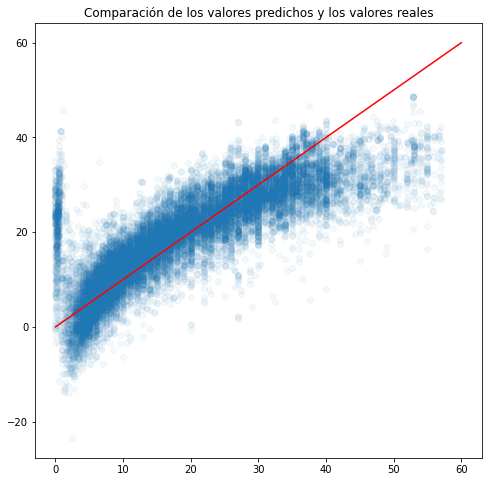

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Comparación de los valores predichos y los valores reales")
plt.scatter(x=y_test, y=y_pred, alpha=0.05)
plt.plot([0, 60], [0,60], 'r-')
plt.show()

### 5.2.2. Filtrado de características
Vamos a utilizar métodos de filtrado para realizar una selección de características teniendo en cuenta que aporten información de manera lineal


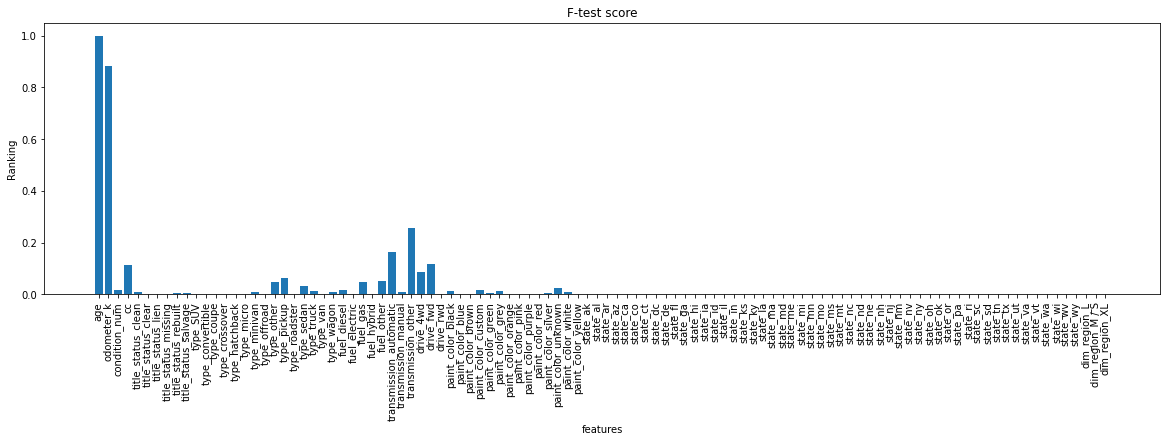

In [ ]:
from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

plt.figure(figsize=(20, 5))
plt.bar(range(X.shape[1]), f_test,  align="center")
plt.xticks(range(X.shape[1]), X_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('F-test score')


plt.show()

In [ ]:
print([(i,n) for (i,n) in zip(range(104),X_names)])

[(0, 'age'), (1, 'odometer_k'), (2, 'condition_num'), (3, 'cc'), (4, 'title_status_clean'), (5, 'title_status_clear'), (6, 'title_status_lien'), (7, 'title_status_missing'), (8, 'title_status_rebuilt'), (9, 'title_status_salvage'), (10, 'type_SUV'), (11, 'type_convertible'), (12, 'type_coupe'), (13, 'type_crossover'), (14, 'type_hatchback'), (15, 'type_micro'), (16, 'type_minivan'), (17, 'type_offroad'), (18, 'type_other'), (19, 'type_pickup'), (20, 'type_roadster'), (21, 'type_sedan'), (22, 'type_truck'), (23, 'type_van'), (24, 'type_wagon'), (25, 'fuel_diesel'), (26, 'fuel_electric'), (27, 'fuel_gas'), (28, 'fuel_hybrid'), (29, 'fuel_other'), (30, 'transmission_automatic'), (31, 'transmission_manual'), (32, 'transmission_other'), (33, 'drive_4wd'), (34, 'drive_fwd'), (35, 'drive_rwd'), (36, 'paint_color_black'), (37, 'paint_color_blue'), (38, 'paint_color_brown'), (39, 'paint_color_custom'), (40, 'paint_color_green'), (41, 'paint_color_grey'), (42, 'paint_color_orange'), (43, 'paint_

Observamos que las variables que ofrecen una mayor relación lineal son age y odometer, tal y como vimos en el EDA. Otras variables que pueden aportar información lineal son cc y las variables binarias transmission_automatic y transmission other (es decir, la vriable transmission) y las drive4wd y drive fwd (es decir, la variable drive)

### 5.2.3. Modelos lineales simples

### 5.2.3.1. age

In [ ]:
# Variable age
lr2 = LinearRegression(fit_intercept=True).fit(X_train[:,0].reshape(-1,1),y_train)
lr2.score(X_train[:,0].reshape(-1,1),y_train) # no ejecutar de nuevo

0.4441743680225665

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(lr2, 'lr_2.pkl') 

['lr_2.pkl']

In [ ]:
lr2 = joblib.load('lr_2.pkl') # Carga del modelo
lr2.score(X_train[:,0].reshape(-1,1),y_train)

0.4441743680225665

In [ ]:
y_pred = lr2.predict(X_test[:,0].reshape(-1,1))
y_pred

array([23.01348557, 16.64398332, 26.19823669, ..., 16.64398332,
       23.01348557,  2.31260327])

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)

print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  85.70099071825325
R2:  0.44461983964523677
MAPE:  96.06316651081535
sqrt(MSE):  9.257482958032018


In [ ]:
lr2.coef_

array([-8.2944826])

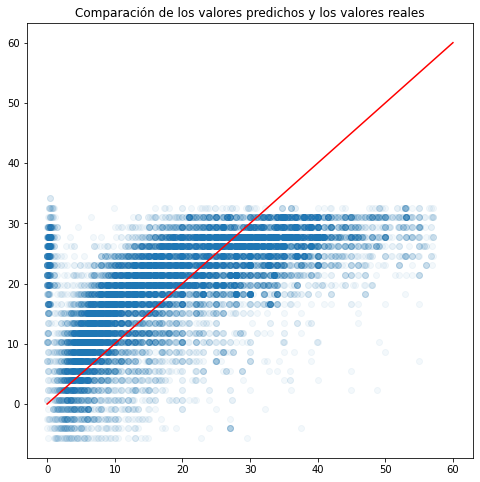

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Comparación de los valores predichos y los valores reales")
plt.scatter(x=y_test, y=y_pred, alpha=0.05)
plt.plot([0, 60], [0,60], 'r-')
plt.show()

Como podemos observar, el coeficiente tiene sentido pero la variabilidad explicada de la variable objetivo es bastante más pobre que la anterior.

### 5.2.3.2. odometer_k

In [ ]:
# Variable odometer_k
lr3 = LinearRegression(fit_intercept=True).fit(X_train[:,1].reshape(-1,1),y_train)
lr3.score(X_train[:,1].reshape(-1,1),y_train) # no ejecutar de nuevo

0.41286104990070616

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(lr3, 'lr_3.pkl') 

['lr_3.pkl']

In [ ]:
lr3 = joblib.load('lr_3.pkl') # Carga del modelo
lr3.score(X_train[:,1].reshape(-1,1),y_train)

0.41286104990070616

In [ ]:
y_pred = lr3.predict(X_test[:,1].reshape(-1,1))
y_pred

array([26.6986246 , 15.35483635, 28.50114135, ..., 22.23427059,
       20.34030223, 10.24775065])

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)

print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  89.81900566521968
R2:  0.41793328932158447
MAPE:  100.91880593837335
sqrt(MSE):  9.477288940684444


In [ ]:
lr3.coef_

array([-7.98196367])

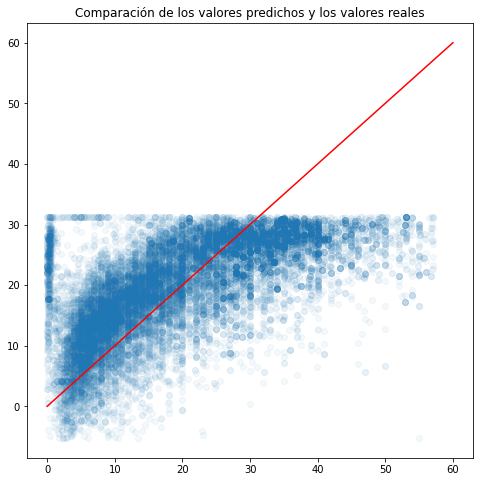

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Comparación de los valores predichos y los valores reales")
plt.scatter(x=y_test, y=y_pred, alpha=0.05)
plt.plot([0, 60], [0,60], 'r-')
plt.show()

Ocurre lo mismo que con la variable age, los kilómetros recorridos por sí solos no son capaces de explicar la variabilidad de la variable objetivo.

### 5.2.4. Modelo lineal con las variables más relevantes

In [ ]:
print([(i,n) for (i,n) in zip(range(104),X_names)])

[(0, 'age'), (1, 'odometer_k'), (2, 'condition_num'), (3, 'cc'), (4, 'title_status_clean'), (5, 'title_status_clear'), (6, 'title_status_lien'), (7, 'title_status_missing'), (8, 'title_status_rebuilt'), (9, 'title_status_salvage'), (10, 'type_SUV'), (11, 'type_convertible'), (12, 'type_coupe'), (13, 'type_crossover'), (14, 'type_hatchback'), (15, 'type_micro'), (16, 'type_minivan'), (17, 'type_offroad'), (18, 'type_other'), (19, 'type_pickup'), (20, 'type_roadster'), (21, 'type_sedan'), (22, 'type_truck'), (23, 'type_van'), (24, 'type_wagon'), (25, 'fuel_diesel'), (26, 'fuel_electric'), (27, 'fuel_gas'), (28, 'fuel_hybrid'), (29, 'fuel_other'), (30, 'transmission_automatic'), (31, 'transmission_manual'), (32, 'transmission_other'), (33, 'drive_4wd'), (34, 'drive_fwd'), (35, 'drive_rwd'), (36, 'paint_color_black'), (37, 'paint_color_blue'), (38, 'paint_color_brown'), (39, 'paint_color_custom'), (40, 'paint_color_green'), (41, 'paint_color_grey'), (42, 'paint_color_orange'), (43, 'paint_

In [ ]:
lr4 = LinearRegression(fit_intercept=True).fit(X_train[:,[0,1,3,30,32,33,34]],y_train)
lr4.score(X_train[:,[0,1,3,30,32,33,34]],y_train)

0.6094497032083932

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(lr4, 'lr_4.pkl') 

['lr_4.pkl']

In [ ]:
lr4 = joblib.load('lr_4.pkl') # Carga del modelo
lr4.score(X_train[:,[0,1,3,30,32,33,34]],y_train)

0.6094497032083932

In [ ]:
y_pred = lr4.predict(X_test[:,[0,1,3,30,32,33,34]])
y_pred

array([17.24144901, 14.41367381, 31.34503552, ..., 20.31391723,
       19.24638639, -3.43979798])

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)

print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  59.23618450358104
R2:  0.6161234383327125
MAPE:  116.96994421870589
sqrt(MSE):  7.696504693923147


In [ ]:
w = lr4.coef_
for noms, coefs in zip(X_names[[0,1,3,30,32,33,34]], w):
    print("coef " + noms + " : "+str(coefs))

coef age : -5.510854055417636
coef odometer_k : -3.3612622627916924
coef cc : 2.9803553466677997
coef transmission_automatic : -2.4506817669986996
coef transmission_other : -0.4064335247330686
coef drive_4wd : 0.6620279119799037
coef drive_fwd : -3.839836396312416


In [ ]:
norm_lr4 = norm(w,2)
norm_lr4

8.479608968083651

Como podemos observar, los coeficientes ahora contienen valores mucho más coherentes que en el primer modelo realizado. A pesar de que hemos sacrificado algunos puntos porcentuales de variabilidad explicada de la variable objetivo y un aumento del MSE, tenemos ahora un modelo con sentido.

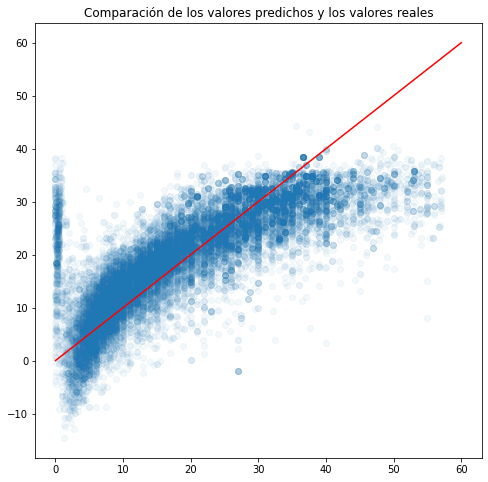

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Comparación de los valores predichos y los valores reales")
plt.scatter(x=y_test, y=y_pred, alpha=0.05)
plt.plot([0, 60], [0,60], 'r-')
plt.show()

### 5.2.5. Regularización Lasso

Buscamos reducir los valores de los coeficientes. Por ello, vamos a buscar los valores de alpha para los cuales la norma de los coeficientes toma un valor prudencial

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.408e+05, tolerance: 1.274e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.409e+05, tolerance: 1.274e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

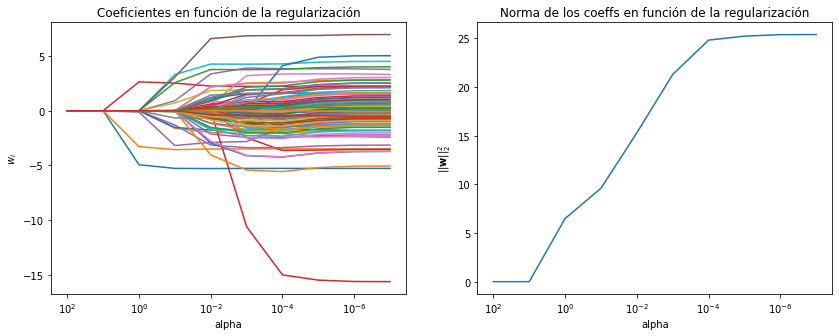

In [ ]:
n_alphas = 10
alphas = np.logspace(-7, 2, n_alphas)
coefs = []
norm2_coefs = []

for a in alphas:
    lasso = Lasso(alpha=a).fit(X_train, y_train)
    coefs.append(lasso.coef_)
    norm2_coefs.append(norm(lasso.coef_,2))

# Display
plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 2, 1)
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$w_i$')
plt.title('Coeficientes en función de la regularización')
plt.axis('tight')

ax = plt.subplot(1, 2, 2)
ax.plot(alphas, norm2_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$||\mathbf{w}||^2_2$')
plt.title('Norma de los coeffs en función de la regularización')
plt.axis('tight')
plt.show()

Se puede observar como al tener valorse tan grandes en los coeficientes, hasta con el uso de alphas pequeños ya se reduce considerablemente la norma. Mirando cuando los coeficientes dejan de hacerse 0 y viceversa, parece tener sentido buscar el alpha óptimo en el intervalo 10^0, 10^-6

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.571e+05, tolerance: 1.020e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.494e+05, tolerance: 1.019e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

best mean cross-validation score: -51.835
best parameters: {'alpha': 0.0003359818286283781}


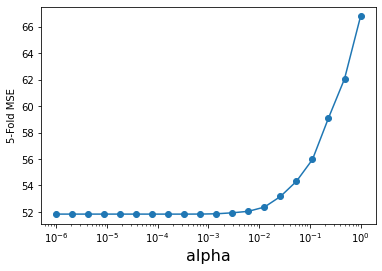

In [ ]:
from sklearn.model_selection import GridSearchCV
K = 5
n_alphas = 20
alpha_vector = np.logspace(-6, 0, n_alphas)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = K)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('alpha', fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

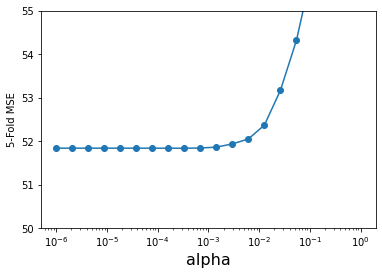

In [ ]:
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('alpha', fontsize=16)
plt.ylabel('5-Fold MSE')
plt.ylim((50, 55))
plt.show()

In [ ]:
alpha_optimo = grid.best_params_['alpha']
alpha_optimo

0.0003359818286283781

Vamos a ejecutar el modelo lasso con el alpha óptimo

In [ ]:
lasso = Lasso(alpha=alpha_optimo)
lasso.fit(X_train, y_train)

lasso.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.769e+04, tolerance: 1.274e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.6648398727707217

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(lasso, 'lr_lasso.pkl') 

['lr_lasso.pkl']

In [ ]:
lasso = joblib.load('lr_lasso.pkl') # Carga del modelo
lasso.score(X_train,y_train)

0.6648398727707217

In [ ]:
y_pred = lasso.predict(X_test)
y_pred

array([14.14471708,  9.06852061, 31.75653847, ..., 20.61516228,
       19.38259131, -2.86334768])

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)

print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  51.670292854922884
R2:  0.6651537480390806
MAPE:  102.67233680393595
sqrt(MSE):  7.188205120537594


In [ ]:
w = lasso.coef_
for noms, coefs in zip(X_names, w):
    print("coef " + noms + " : "+str(coefs))

coef age : -5.268943902245526
coef odometer_k : -3.4832120883733864
coef condition_num : 0.003096248534292539
coef cc : 2.229876277025864
coef title_status_clean : 3.8657987097766333
coef title_status_clear : -0.542304408376848
coef title_status_lien : 3.3275909678415605
coef title_status_missing : -1.4319587242130378
coef title_status_rebuilt : -0.3371076953254859
coef title_status_salvage : 0.0013637515957184907
coef type_SUV : -0.517082527869185
coef type_convertible : 2.586274591443477
coef type_coupe : 0.05207860196945412
coef type_crossover : -3.3230634847853913
coef type_hatchback : -3.3666594079230108
coef type_micro : 0.0
coef type_minivan : -0.004296772435388658
coef type_offroad : -1.088718800375258
coef type_other : 1.9322457577085022
coef type_pickup : 4.27830836995252
coef type_roadster : 2.501900378323047
coef type_sedan : -2.041845092145128
coef type_truck : 3.78080365637046
coef type_van : 0.5778280384091758
coef type_wagon : -2.428923051206483
coef fuel_diesel : 6.870

In [ ]:
norm_lasso = norm(w,2)
norm_lasso

23.685119291846647

Observamos que se han eliminado coeficientes de variables binarias, y que los que no se han eliminado tienen valores que sí son creibles, a diferencia del primer modelo lineal creado. Si nos fijamos en las métricas, estas han mejorado ligeramente, luego tenemos un modelo más sencillo y con mejores métricas

Las del primer modelo
MSE:  51.680246109208476
R2:  0.665089246568154
MAPE:  102.58684667881155
sqrt(MSE):  7.188897419577531

Las de lasso
MSE:  51.670292854922884
R2:  0.6651537480390806
MAPE:  102.67233680393595
sqrt(MSE):  7.188205120537594

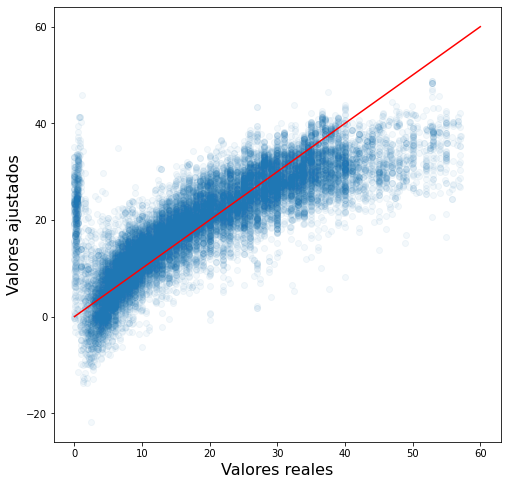

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test, y=y_pred, alpha=0.05)
plt.plot([0, 60], [0,60], 'r-')
plt.xlabel("Valores reales",fontsize=16)
plt.ylabel("Valores ajustados",fontsize=16)
plt.show()

# 5.3. Árboles de decisión y Random Forest

## 5.3.1. Optimizacion simultánea

In [ ]:
from sklearn.tree import DecisionTreeRegressor

max_depth = range(2, 25)
min_samples_leaf = range(3,52,3)

param_grid = {'max_depth': max_depth,'min_samples_leaf':min_samples_leaf}

K = 5
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), 
                    param_grid=param_grid, 
                    cv=5,
                    return_train_score=True)
grid.fit(X_train,y_train)

In [ ]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.797
best parameters: {'max_depth': 24, 'min_samples_leaf': 3}


In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=24,min_samples_leaf=3)
tree_reg.fit(X_train, y_train)

print("Train: ", tree_reg.score(X_train, y_train))
print("Test: ", tree_reg.score(X_test, y_test))

Train:  0.9179377560517036
Test:  0.8016876398065592


In [ ]:
tree_reg.score(X_train,y_train) # no ejecutar de nuevo

0.9179377560517036

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(tree_reg,'arbol1.pkl') 

['arbol1.pkl']

In [ ]:
tree_reg = joblib.load('arbol1.pkl') # Carga del modelo
tree_reg.score(X_train,y_train)

0.9179377560517036

In [ ]:
y_pred = tree_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  30.601679630393374
R2:  0.8016876398065592
MAPE:  23.537231664448058
sqrt(MSE):  5.531878490205056


In [ ]:
print("MSE: ",mean_squared_error(y_train,tree_reg.predict(X_train)))
print("R2: ",r2_score(y_train,tree_reg.predict(X_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train,tree_reg.predict(X_train)))
print("sqrt(MSE): ",np.sqrt(mean_squared_error(y_train,tree_reg.predict(X_train))))

MSE:  12.655380836003392
R2:  0.9179377560517036
MAPE:  13.405167207204036
sqrt(MSE):  3.557440208352544


## 5.3.2. Optimizacion Max depth

best mean cross-validation score: 0.786
best parameters: {'max_depth': 23}


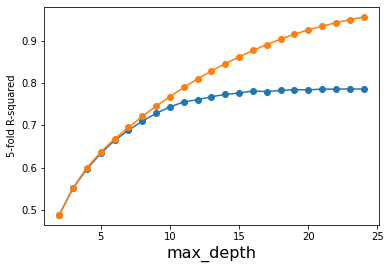

In [ ]:
max_depth = range(2, 25)
param_grid = {'max_depth': max_depth}

K = 5
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), 
                    param_grid=param_grid, 
                    cv=5,
                    return_train_score=True)
grid.fit(X_train,y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(max_depth, scores_test, '-o', label='Validación')
plt.plot(max_depth, scores_train, '-o', label='Entrenamiento')
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

Apreciamos como a partir de profundidad 11 comenzamos a tener sobreentrenemianto. Vamos a crear un árbol con esta profundidad

In [ ]:
tree_reg2 = DecisionTreeRegressor(random_state=0,max_depth=11)
tree_reg2.fit(X_train, y_train)

print("Train: ", tree_reg2.score(X_train, y_train))
print("Test: ", tree_reg2.score(X_test, y_test))

Train:  0.7887443031570298
Test:  0.7512697297317543


In [ ]:
tree_reg2.score(X_train,y_train) # no ejecutar de nuevo

0.7887443031570298

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(tree_reg2,'arbol2.pkl') 

['arbol2.pkl']

In [ ]:
tree_reg2 = joblib.load('arbol2.pkl') # Carga del modelo
tree_reg2.score(X_train,y_train)

0.7887443031570298

In [ ]:
y_pred = tree_reg2.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  38.381692586914035
R2:  0.7512697297317543
MAPE:  48.15312202945448
sqrt(MSE):  6.195296004785731


In [ ]:
print("MSE: ",mean_squared_error(y_train,tree_reg2.predict(X_train)))
print("R2: ",r2_score(y_train,tree_reg2.predict(X_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train,tree_reg2.predict(X_train)))
print("sqrt(MSE): ",np.sqrt(mean_squared_error(y_train,tree_reg2.predict(X_train))))

MSE:  32.57918829282233
R2:  0.7887443031570298
MAPE:  47.10083391761296
sqrt(MSE):  5.707818172719094


### Max depth -> min_samples_leaf

best mean cross-validation score: 0.757
best parameters: {'min_samples_leaf': 3}


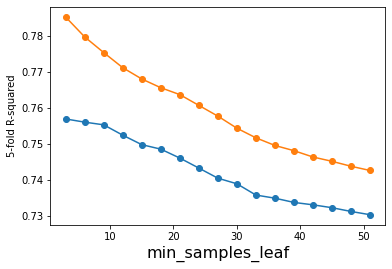

In [ ]:
min_samples_leaf = range(3,52,3)
param_grid = {'min_samples_leaf': min_samples_leaf}

K = 5
grid = GridSearchCV(DecisionTreeRegressor(random_state=0,max_depth=11), 
                    param_grid=param_grid, 
                    cv=5,
                    return_train_score=True)
grid.fit(X_train,y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(min_samples_leaf, scores_test, '-o', label='Validación')
plt.plot(min_samples_leaf, scores_train, '-o', label='Entrenamiento')
plt.xlabel('min_samples_leaf', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

Observamos que la diferencia entre entrenamiento y validacion es más o menos constante. Parece que la menor diferencia sin perder demasiada  de validación es para min_samples_lead=9

In [ ]:
tree_reg3 = DecisionTreeRegressor(random_state=0,max_depth=11,min_samples_leaf=9)
tree_reg3.fit(X_train, y_train)

print("Train: ", tree_reg3.score(X_train, y_train))
print("Test: ", tree_reg3.score(X_test, y_test))

Train:  0.7774760646537504
Test:  0.7497937284225016


In [ ]:
tree_reg3.score(X_train,y_train) # no ejecutar de nuevo

0.7774760646537504

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(tree_reg3,'arbol3.pkl') 

['arbol3.pkl']

In [ ]:
tree_reg3 = joblib.load('arbol3.pkl') # Carga del modelo
tree_reg3.score(X_train,y_train)

0.7774760646537504

In [ ]:
y_pred = tree_reg3.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  38.609455088231314
R2:  0.7497937284225016
MAPE:  53.11335355826088
sqrt(MSE):  6.213650705360844


In [ ]:
print("MSE: ",mean_squared_error(y_train,tree_reg3.predict(X_train)))
print("R2: ",r2_score(y_train,tree_reg3.predict(X_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train,tree_reg3.predict(X_train)))
print("sqrt(MSE): ",np.sqrt(mean_squared_error(y_train,tree_reg3.predict(X_train))))

MSE:  34.31694054950892
R2:  0.7774760646537504
MAPE:  51.74190405457957
sqrt(MSE):  5.858066280737093


## 5.3.3. Optimización min_samples_leaf

In [ ]:
min_samples_leaf = range(3,52,3)
param_grid = {'min_samples_leaf': min_samples_leaf}

K = 5
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), 
                    param_grid=param_grid, 
                    cv=5,
                    return_train_score=True)
grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'min_samples_leaf': range(3, 52, 3)},
             return_train_score=True)

best mean cross-validation score: 0.802
best parameters: {'min_samples_leaf': 3}


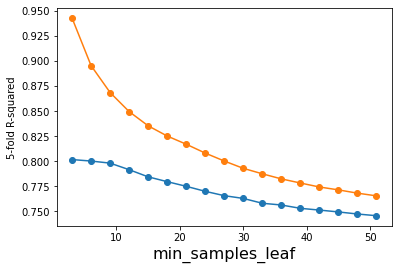

In [ ]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(min_samples_leaf, scores_test, '-o', label='Validación')
plt.plot(min_samples_leaf, scores_train, '-o', label='Entrenamiento')
plt.xlabel('min_samples_leaf', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

Nos quedamos antes de que haya demasiado sobreentrenamiento, min_samples_leaf=18

In [ ]:
tree_reg4 = DecisionTreeRegressor(random_state=0,min_samples_leaf=18)
tree_reg4.fit(X_train, y_train)

print("Train: ", tree_reg4.score(X_train, y_train))
print("Test: ", tree_reg4.score(X_test, y_test))

Train:  0.8316658142976591
Test:  0.7774365454045385


In [ ]:
tree_reg4.score(X_train,y_train) # no ejecutar de nuevo

0.8316658142976591

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(tree_reg4,'arbol4.pkl') 

['arbol4.pkl']

In [ ]:
tree_reg4 = joblib.load('arbol4.pkl') # Carga del modelo
tree_reg4.score(X_train,y_train)

0.8316658142976591

In [ ]:
y_pred = tree_reg4.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  34.343878154243164
R2:  0.7774365454045385
MAPE:  47.0488245819446
sqrt(MSE):  5.86036501885703


In [ ]:
print("MSE: ",mean_squared_error(y_train,tree_reg4.predict(X_train)))
print("R2: ",r2_score(y_train,tree_reg4.predict(X_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train,tree_reg4.predict(X_train)))
print("sqrt(MSE): ",np.sqrt(mean_squared_error(y_train,tree_reg4.predict(X_train))))

MSE:  25.959968010670842
R2:  0.8316658142976591
MAPE:  43.27016716036345
sqrt(MSE):  5.095092541914312


### min_samples_leaf -> Max depth

best mean cross-validation score: 0.776
best parameters: {'max_depth': 24}


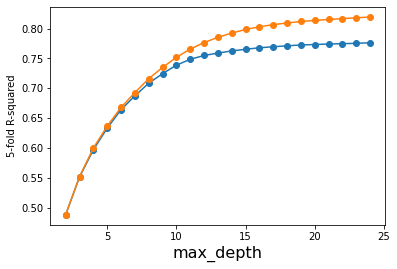

In [ ]:
max_depth = range(2,25)
param_grid = {'max_depth': max_depth}

K = 5
grid = GridSearchCV(DecisionTreeRegressor(random_state=0,min_samples_leaf=18), 
                    param_grid=param_grid, 
                    cv=5,
                    return_train_score=True)
grid.fit(X_train,y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(max_depth, scores_test, '-o', label='Validación')
plt.plot(max_depth, scores_train, '-o', label='Entrenamiento')
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

Parece que a partir de 14 comenzamos a tener algo de sobreajuste

In [ ]:
tree_reg5 = DecisionTreeRegressor(random_state=0,max_depth=14,min_samples_leaf=18)
tree_reg5.fit(X_train, y_train)

print("Train: ", tree_reg5.score(X_train, y_train))
print("Test: ", tree_reg5.score(X_test, y_test))

Train:  0.7947349683319587
Test:  0.7560968432380897


In [ ]:
tree_reg5.score(X_train,y_train) # no ejecutar de nuevo

0.7947349683319587

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(tree_reg5,'arbol5.pkl') 

['arbol5.pkl']

In [ ]:
tree_reg5 = joblib.load('arbol5.pkl') # Carga del modelo
tree_reg5.score(X_train,y_train)

0.7947349683319587

In [ ]:
y_pred = tree_reg5.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  37.63681828398944
R2:  0.7560968432380897
MAPE:  50.54297704844994
sqrt(MSE):  6.1348853521471325


In [ ]:
print("MSE: ",mean_squared_error(y_train,tree_reg5.predict(X_train)))
print("R2: ",r2_score(y_train,tree_reg5.predict(X_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train,tree_reg5.predict(X_train)))
print("sqrt(MSE): ",np.sqrt(mean_squared_error(y_train,tree_reg5.predict(X_train))))

MSE:  31.655326775003303
R2:  0.7947349683319587
MAPE:  47.39162393260943
sqrt(MSE):  5.626306672676429


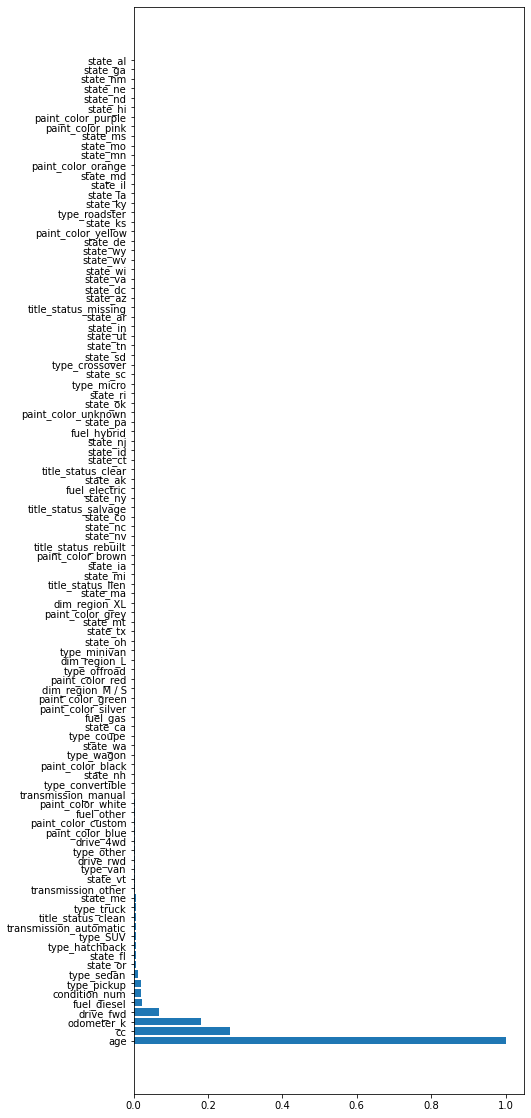

In [ ]:
importances = tree_reg5.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(7, 20))
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), X_names[indices])
plt.show()

## 5.3.4. Random Forest

RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

### Priorización de las métricas

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
n_estimators = range(50,201,50)
param_grid = {'n_estimators': n_estimators}

K = 5 

clf = RandomForestRegressor(random_state=0,max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.879
best parameters: {'n_estimators': 200}


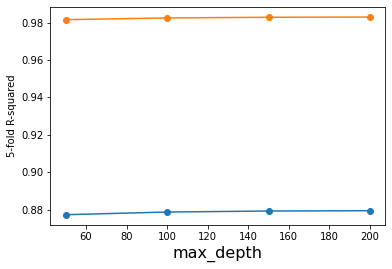

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(n_estimators, scores_test, '-o', label='Validación')
plt.plot(n_estimators, scores_train, '-o', label='Entrenamiento')
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
max_features = range(3,15)
param_grid = {'max_features': max_features}

K = 5 

clf = RandomForestRegressor(random_state=0,n_estimators =200)
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.884
best parameters: {'max_features': 14}


In [ ]:
rf1 = RandomForestRegressor(random_state=0,n_estimators = 200,max_features=14)
rf1.fit(X_train, y_train)

print("Train: ", rf1.score(X_train, y_train))
print("Test: ", rf1.score(X_test, y_test))

Train:  0.9848150568844642
Test:  0.8835903419101817


In [ ]:
rf1.score(X_train,y_train) # no ejecutar de nuevo

0.9848150568844642

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(rf1,'rf1.pkl') 

['rf1.pkl']

In [ ]:
rf1 = joblib.load('rf1.pkl') # Carga del modelo
rf1.score(X_train,y_train)

0.9848150568844642

In [ ]:
y_pred = rf1.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  17.96323264608131
R2:  0.8835903419101817
MAPE:  19.466363985253558
sqrt(MSE):  4.2383053979251315


In [ ]:
print("MSE: ",mean_squared_error(y_train,rf1.predict(X_train)))
print("R2: ",r2_score(y_train,rf1.predict(X_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train,rf1.predict(X_train)))
print("sqrt(MSE): ",np.sqrt(mean_squared_error(y_train,rf1.predict(X_train))))

MSE:  2.3417741077276775
R2:  0.9848150568844642
MAPE:  7.871776349545763
sqrt(MSE):  1.5302856294586569


Intentemos limitar un poco este sobreajuste controlando aumentando el mínimo numero de elementos por hoja.

### Balance entre métricas y sobreajuste

Intentamos balancear vía el número de estimadores y la profundidad máxima

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
max_depth = range(3, 16)
param_grid = {'max_depth': max_depth}

K = 5 

clf = RandomForestRegressor(random_state=0, n_estimators=50, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.769
best parameters: {'max_depth': 15}


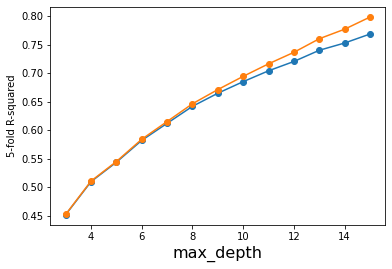

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(max_depth, scores_test, '-o', label='Validación')
plt.plot(max_depth, scores_train, '-o', label='Entrenamiento')
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
max_depth = range(15, 25)
param_grid = {'max_depth': max_depth}

K = 5 

clf = RandomForestRegressor(random_state=0, n_estimators=50, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.847
best parameters: {'max_depth': 24}


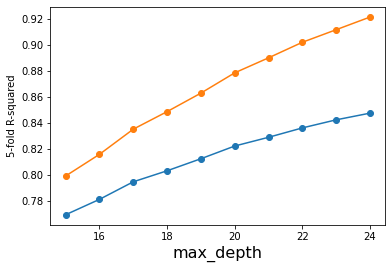

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(max_depth, scores_test, '-o', label='Validación')
plt.plot(max_depth, scores_train, '-o', label='Entrenamiento')
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
max_depth = range(3, 16)
param_grid = {'max_depth': max_depth}

K = 5 

clf = RandomForestRegressor(random_state=0, n_estimators=100, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.770
best parameters: {'max_depth': 15}


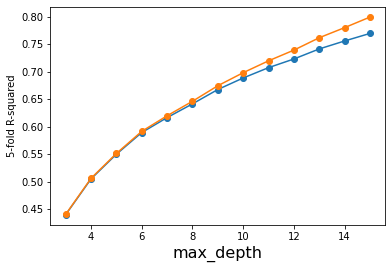

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(max_depth, scores_test, '-o', label='Validación')
plt.plot(max_depth, scores_train, '-o', label='Entrenamiento')
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
max_depth = range(15, 25)
param_grid = {'max_depth': max_depth}

K = 5 

clf = RandomForestRegressor(random_state=0, n_estimators=100, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.848
best parameters: {'max_depth': 24}


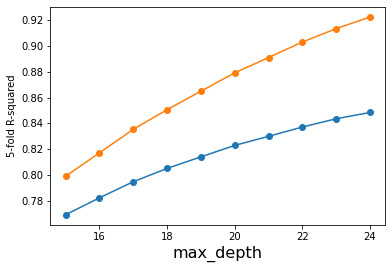

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(max_depth, scores_test, '-o', label='Validación')
plt.plot(max_depth, scores_train, '-o', label='Entrenamiento')
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
max_depth = range(3, 16)
param_grid = {'max_depth': max_depth}

K = 5 

clf = RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.770
best parameters: {'max_depth': 15}


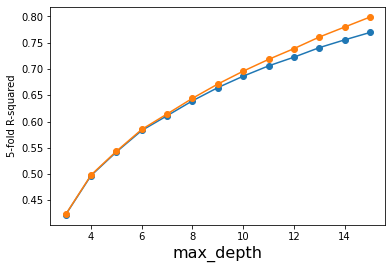

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(max_depth, scores_test, '-o', label='Validación')
plt.plot(max_depth, scores_train, '-o', label='Entrenamiento')
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
max_depth = range(15, 25)
param_grid = {'max_depth': max_depth}

K = 5 

clf = RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.849
best parameters: {'max_depth': 24}


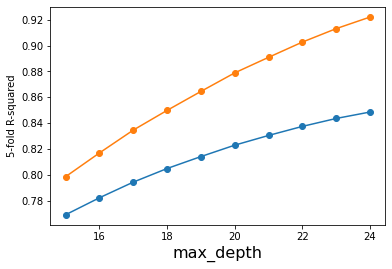

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(max_depth, scores_test, '-o', label='Validación')
plt.plot(max_depth, scores_train, '-o', label='Entrenamiento')
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

Dado la cantidad de variables dispoibles, se ha optado por utilizar como numero máximo de características la raiz cuadrada del total

In [ ]:
rf4 = RandomForestRegressor(random_state=0,n_estimators = 50,max_features='sqrt',max_depth=19)
rf4.fit(X_train, y_train)

print("Train: ", rf4.score(X_train, y_train))
print("Test: ", rf4.score(X_test, y_test))

Train:  0.8639619479032588
Test:  0.8098868031247528


In [ ]:
rf4.score(X_train,y_train) # no ejecutar de nuevo

0.8639619479032588

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(rf4,'rf4.pkl') 

['rf4.pkl']

In [ ]:
rf4 = joblib.load('rf4.pkl') # Carga del modelo
rf4.score(X_train,y_train)

0.8639619479032588

In [ ]:
y_pred = rf4.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  29.336462632038412
R2:  0.8098868031247528
MAPE:  37.86575266025118
sqrt(MSE):  5.416314487918737


In [ ]:
print("MSE: ",mean_squared_error(y_train,rf4.predict(X_train)))
print("R2: ",r2_score(y_train,rf4.predict(X_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train,rf4.predict(X_train)))
print("sqrt(MSE): ",np.sqrt(mean_squared_error(y_train,rf4.predict(X_train))))

MSE:  20.979359991143305
R2:  0.8639619479032588
MAPE:  32.22051763319961
sqrt(MSE):  4.580323131738994


In [ ]:
rf5 = RandomForestRegressor(random_state=0,n_estimators = 200,max_features='sqrt',max_depth=18)
rf5.fit(X_train, y_train)

print("Train: ", rf5.score(X_train, y_train))
print("Test: ", rf5.score(X_test, y_test))

Train:  0.8483971134603847
Test:  0.7992899042535297


In [ ]:
rf5.score(X_train,y_train) # no ejecutar de nuevo

0.8483971134603847

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(rf5,'rf5.pkl') 

['rf5.pkl']

In [ ]:
rf5 = joblib.load('rf5.pkl') # Carga del modelo
rf5.score(X_train,y_train)

0.8483971134603847

In [ ]:
y_pred = rf5.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  30.97167540453795
R2:  0.7992899042535297
MAPE:  42.012996768293036
sqrt(MSE):  5.565220157777943


In [ ]:
print("MSE: ",mean_squared_error(y_train,rf5.predict(X_train)))
print("R2: ",r2_score(y_train,rf5.predict(X_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train,rf5.predict(X_train)))
print("sqrt(MSE): ",np.sqrt(mean_squared_error(y_train,rf5.predict(X_train))))

MSE:  23.379719743041136
R2:  0.8483971134603847
MAPE:  36.83950630088202
sqrt(MSE):  4.835257981022433


Con este par de parámetros no se ha conseugido mejorar significativamente la precisión del modelo sin cometer demasiado overfitting, vamos a probar con min_samples_leaf y el numero de estimadores.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
min_samples_leaf = range(3,52,3)
param_grid = {'min_samples_leaf': min_samples_leaf}

K = 5 

clf = RandomForestRegressor(random_state=0, n_estimators=50, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.818
best parameters: {'min_samples_leaf': 3}


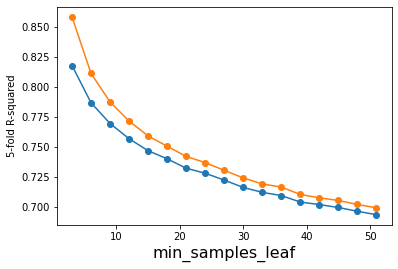

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(min_samples_leaf, scores_test, '-o', label='Validación')
plt.plot(min_samples_leaf, scores_train, '-o', label='Entrenamiento')
plt.xlabel('min_samples_leaf', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
min_samples_leaf = range(3,52,3)
param_grid = {'min_samples_leaf': min_samples_leaf}

K = 5 

clf = RandomForestRegressor(random_state=0, n_estimators=100, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.819
best parameters: {'min_samples_leaf': 3}


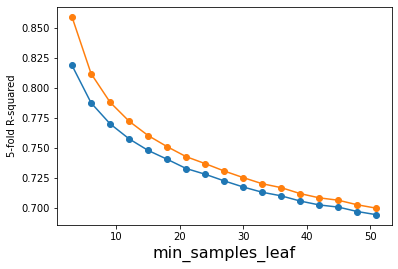

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(min_samples_leaf, scores_test, '-o', label='Validación')
plt.plot(min_samples_leaf, scores_train, '-o', label='Entrenamiento')
plt.xlabel('min_samples_leaf', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
min_samples_leaf = range(3,52,3)
param_grid = {'min_samples_leaf': min_samples_leaf}

K = 5 

clf = RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.819
best parameters: {'min_samples_leaf': 3}


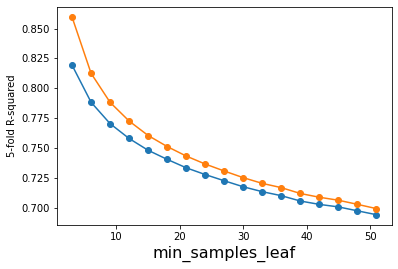

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(min_samples_leaf, scores_test, '-o', label='Validación')
plt.plot(min_samples_leaf, scores_train, '-o', label='Entrenamiento')
plt.xlabel('min_samples_leaf', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
min_samples_leaf = range(1,7)
param_grid = {'min_samples_leaf': min_samples_leaf}

K = 5 

clf = RandomForestRegressor(random_state=0, n_estimators=50, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.877
best parameters: {'min_samples_leaf': 1}


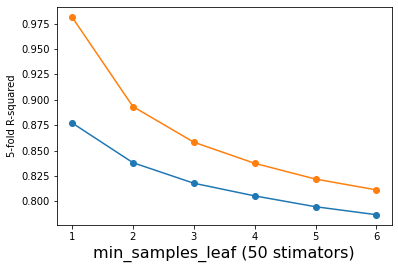

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(min_samples_leaf, scores_test, '-o', label='Validación')
plt.plot(min_samples_leaf, scores_train, '-o', label='Entrenamiento')
plt.xlabel('min_samples_leaf (50 stimators)', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
min_samples_leaf = range(1,7)
param_grid = {'min_samples_leaf': min_samples_leaf}

K = 5 

clf = RandomForestRegressor(random_state=0, n_estimators=100, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.879
best parameters: {'min_samples_leaf': 1}


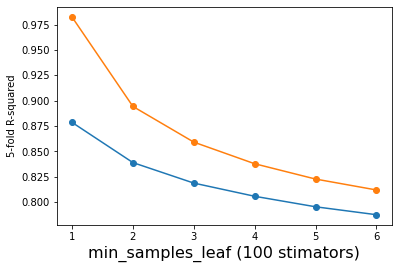

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(min_samples_leaf, scores_test, '-o', label='Validación')
plt.plot(min_samples_leaf, scores_train, '-o', label='Entrenamiento')
plt.xlabel('min_samples_leaf (100 stimators)', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
min_samples_leaf = range(1,7)
param_grid = {'min_samples_leaf': min_samples_leaf}

K = 5 

clf = RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.879
best parameters: {'min_samples_leaf': 1}


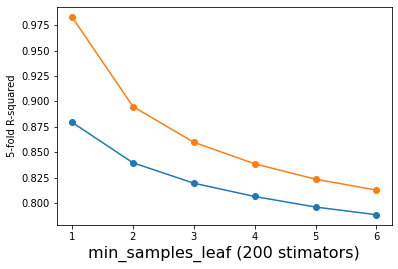

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(min_samples_leaf, scores_test, '-o', label='Validación')
plt.plot(min_samples_leaf, scores_train, '-o', label='Entrenamiento')
plt.xlabel('min_samples_leaf (200 stimators)', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

Vemos que para min_samples_leaf = 3 o 4 obtenemos mejores valores con un sobreajuste controlado

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
n_estimators = range(50,201,50)
param_grid = {'n_estimators': n_estimators}

K = 5 

clf = RandomForestRegressor(random_state=0, min_samples_leaf=3, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.819
best parameters: {'n_estimators': 200}


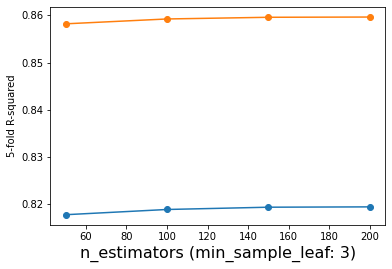

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(n_estimators, scores_test, '-o', label='Validación')
plt.plot(n_estimators, scores_train, '-o', label='Entrenamiento')
plt.xlabel('n_estimators (min_sample_leaf: 3)', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# parámetros para GridSearch
n_estimators = range(50,201,50)
param_grid = {'n_estimators': n_estimators}

K = 5 

clf = RandomForestRegressor(random_state=0, min_samples_leaf=4, max_features='sqrt')
grid = GridSearchCV(clf, param_grid=param_grid, cv=K, return_train_score=True) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.806
best parameters: {'n_estimators': 200}


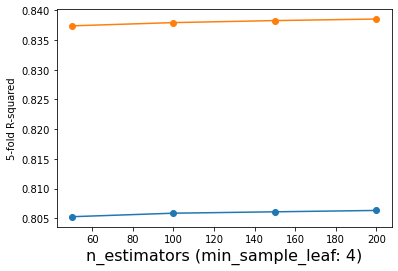

In [ ]:
scores_test = np.array(grid.cv_results_['mean_test_score'])
scores_train = np.array(grid.cv_results_['mean_train_score'])
plt.plot(n_estimators, scores_test, '-o', label='Validación')
plt.plot(n_estimators, scores_train, '-o', label='Entrenamiento')
plt.xlabel('n_estimators (min_sample_leaf: 4)', fontsize=16)
plt.ylabel('{}-fold R-squared'.format(K))
#plt.ylim((0.5, 1))
plt.show()

En ambos casos la diferencia entrer validación y entrenamiento se mantiene constante, cogemos por lo tanto la mejor actuación

In [ ]:
rf2 = RandomForestRegressor(random_state=0,n_estimators = 200,max_features='sqrt',min_samples_leaf=4)
rf2.fit(X_train, y_train)

print("Train: ", rf2.score(X_train, y_train))
print("Test: ", rf2.score(X_test, y_test))

Train:  0.8461268280913957
Test:  0.8086708228450339


In [ ]:
rf2.score(X_train,y_train) # no ejecutar de nuevo

0.8461268280913957

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(rf2,'rf2.pkl') 

['rf2.pkl']

In [ ]:
rf2 = joblib.load('rf2.pkl') # Carga del modelo
rf2.score(X_train,y_train)

0.8461268280913957

In [ ]:
y_pred = rf2.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  29.524101158051295
R2:  0.8086708228450339
MAPE:  49.70558712777661
sqrt(MSE):  5.433608484060229


In [ ]:
print("MSE: ",mean_squared_error(y_train,rf2.predict(X_train)))
print("R2: ",r2_score(y_train,rf2.predict(X_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train,rf2.predict(X_train)))
print("sqrt(MSE): ",np.sqrt(mean_squared_error(y_train,rf2.predict(X_train))))

MSE:  23.729836003194407
R2:  0.8461268280913957
MAPE:  46.18042789998259
sqrt(MSE):  4.871327950692132


In [ ]:
rf3 = RandomForestRegressor(random_state=0,n_estimators = 200,max_features='sqrt',min_samples_leaf=3)
rf3.fit(X_train, y_train)

print("Train: ", rf3.score(X_train, y_train))
print("Test: ", rf3.score(X_test, y_test))

Train:  0.866421777491001
Test:  0.8214399878994959


In [ ]:
rf3.score(X_train,y_train) # no ejecutar de nuevo

0.866421777491001

In [ ]:
# guardamos modelo entrenado (no ejecutar de nuevo)
joblib.dump(rf3,'rf3.pkl') 

['rf3.pkl']

In [ ]:
rf3 = joblib.load('rf3.pkl') # Carga del modelo
rf3.score(X_train,y_train)

0.866421777491001

In [ ]:
y_pred = rf3.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

MSE:  27.553684902790653
R2:  0.8214399878994959
MAPE:  45.13265171529854
sqrt(MSE):  5.249160399796396


In [ ]:
print("MSE: ",mean_squared_error(y_train,rf3.predict(X_train)))
print("R2: ",r2_score(y_train,rf3.predict(X_train)))
print("MAPE: ",mean_absolute_percentage_error(y_train,rf3.predict(X_train)))
print("sqrt(MSE): ",np.sqrt(mean_squared_error(y_train,rf3.predict(X_train))))

MSE:  20.600012818475673
R2:  0.866421777491001
MAPE:  40.496602421990275
sqrt(MSE):  4.538723699287683


In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel='poly', gamma='auto', degree=5, coef0=1 ,C=100).fit(X_train, y_train)

In [ ]:
svr.score(X_train,y_train)

In [ ]:
y_pred = svr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MSE: ",mse)
print("R2: ",r2)
print("MAPE: ",mape)
print("sqrt(MSE): ",np.sqrt(mse))

Busqueda de hiperparametros en malla

In [ ]:
# Paso 2: búsqueda de hiperparámetros en rejilla
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma': vectorG}

n_folds = 5

grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv=n_folds)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

In [ ]:
# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC), len(vectorG))

plt.figure(figsize=(10, 6))
plt.imshow(scores, interpolation='nearest', vmin=0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('{}-fold accuracy'.format(n_folds))
plt.show()

In [ ]:
# Paso 3: evaluación de resultados
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svm_model = SVR(kernel='rbf', gamma=Gopt, C=Copt)
svm_model.fit(X_train_scaled, y_train)
print('Accuracy (TEST): %0.2f' % svm_model.score(X_test_scaled, y_test))

# 5.4. NN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es= EarlyStopping(monitor='val_mse',
                  patience=2
                 )
checkpoints=ModelCheckpoint(filepath='./',
                            monitor="val_mse",
                            verbose=0,
                            save_best_only=True
                           )

callbacks=[checkpoints,es]

In [ ]:
X_trainNN, X_testNN, y_trainNN, y_testNN = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

### 5.4.1. NN 1

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units = 256, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 256)               26880     
                                                                 
 dense_37 (Dense)            (None, 256)               65792     
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 dense_39 (Dense)            (None, 1)                 129       
                                                                 
Total params: 125,697
Trainable params: 125,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.001) #'adam'

model.compile(loss='mse',optimizer=optimizer,metrics=['mse',
                                                      #tf.keras.metrics.MeanAbsolutePercentageError(name="mape", dtype=None),
                                                      tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None)])

In [ ]:
# Lotes
lote = 32
# Pasadas
pasada = 25
# Recordemos 
n_train = len(X_trainNN)
print("Nº datos de entrenamiento: "+str(n_train))
#pasos
pasos = math.ceil(n_train/lote)
print("Nº de actualizaciones de los pesos en cada epoch: " + str(pasos))

Nº datos de entrenamiento: 61969
Nº de actualizaciones de los pesos en cada epoch: 1937


In [ ]:
#Realizar el entrenamiento
historial = model.fit(
    X_trainNN,y_trainNN, validation_data=(X_testNN,y_testNN),
    epochs=pasada, steps_per_epoch=pasos,callbacks=callbacks)

Epoch 1/25
1937/1937 [==============================] - 8s 4ms/step - loss: 46.3496 - mse: 46.3496 - rmse: 6.8081 - val_loss: 41.4301 - val_mse: 41.4301 - val_rmse: 6.4366
Epoch 2/25
1937/1937 [==============================] - 7s 4ms/step - loss: 37.1257 - mse: 37.1257 - rmse: 6.0931 - val_loss: 36.9209 - val_mse: 36.9209 - val_rmse: 6.0763
Epoch 3/25
1937/1937 [==============================] - 7s 4ms/step - loss: 33.8987 - mse: 33.8987 - rmse: 5.8223 - val_loss: 40.1832 - val_mse: 40.1832 - val_rmse: 6.3390
Epoch 4/25
1937/1937 [==============================] - 8s 4ms/step - loss: 31.8581 - mse: 31.8581 - rmse: 5.6443 - val_loss: 36.9225 - val_mse: 36.9225 - val_rmse: 6.0764
Epoch 5/25
1937/1937 [==============================] - 8s 4ms/step - loss: 30.1642 - mse: 30.1642 - rmse: 5.4922 - val_loss: 36.4699 - val_mse: 36.4699 - val_rmse: 6.0390
Epoch 6/25
1937/1937 [==============================] - 8s 4ms/step - loss: 28.8197 - mse: 28.8197 - rmse: 5.3684 - val_loss: 37.3773 - val_

## 5.4.2. NN2

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units = 256, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 264)               27720     
                                                                 
 dropout_24 (Dropout)        (None, 264)               0         
                                                                 
 dense_57 (Dense)            (None, 264)               69960     
                                                                 
 dropout_25 (Dropout)        (None, 264)               0         
                                                                 
 dense_58 (Dense)            (None, 128)               33920     
                                                                 
 dense_59 (Dense)            (None, 1)                 129       
                                                                 
Total params: 131,729
Trainable params: 131,729
Non-t

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.001) #'adam'

model.compile(loss='mse',optimizer=optimizer,metrics=['mse',
                                                      #tf.keras.metrics.MeanAbsolutePercentageError(name="mape", dtype=None),
                                                      tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None)])

In [ ]:
#Realizar el entrenamiento
historial = model.fit(
    X_trainNN,y_trainNN, validation_data=(X_testNN,y_testNN),
    epochs=20, steps_per_epoch=pasos,callbacks=callbacks)

Epoch 1/20
1937/1937 [==============================] - 14s 7ms/step - loss: 32.5977 - mse: 32.5977 - rmse: 5.7094 - val_loss: 35.3813 - val_mse: 35.3813 - val_rmse: 5.9482
Epoch 2/20
1937/1937 [==============================] - 9s 4ms/step - loss: 31.9755 - mse: 31.9755 - rmse: 5.6547 - val_loss: 31.8164 - val_mse: 31.8164 - val_rmse: 5.6406
Epoch 3/20
1937/1937 [==============================] - 9s 4ms/step - loss: 31.2575 - mse: 31.2575 - rmse: 5.5908 - val_loss: 37.6411 - val_mse: 37.6411 - val_rmse: 6.1352
Epoch 4/20
1937/1937 [==============================] - 9s 5ms/step - loss: 30.8976 - mse: 30.8976 - rmse: 5.5586 - val_loss: 30.9276 - val_mse: 30.9276 - val_rmse: 5.5613
Epoch 5/20
1937/1937 [==============================] - 9s 5ms/step - loss: 30.7644 - mse: 30.7644 - rmse: 5.5466 - val_loss: 30.5836 - val_mse: 30.5836 - val_rmse: 5.5302
Epoch 6/20
1937/1937 [==============================] - 10s 5ms/step - loss: 30.0339 - mse: 30.0339 - rmse: 5.4803 - val_loss: 29.7591 - va

In [ ]:
#Graficamos la función de pérdida y la precisión en entrenamiento y validación.
precision = historial.history['mse']
validac_precision = historial.history['val_mse']
epochs2 = range (1, len(precision)+1)

plt.figure(figsize=(9,9)).suptitle("Entrenamiento del modelo",fontsize=22)
plt.plot(epochs2, precision, 'bo', label='Precisión Entrenamiento')
plt.plot(epochs2, validac_precision, 'b', label='Precisión Valicación')
plt.title('Precisión en Entrenamiento y Validación')
plt.legend()
plt.show()

In [ ]:
# Guardamos el modelo
model.save('nn.h5')

In [ ]:
# Cargamos modelo ya entenado
nn = keras.models.load_model('/content/nn.h5')

In [ ]:
ev = nn.evaluate(X_test,y_test)
ev

646/646 [==============================] - 2s 2ms/step - loss: 29.0030 - mse: 29.0030 - rmse: 5.3854


[29.00300407409668, 29.00300407409668, 5.385443687438965]

In [ ]:
tev = nn.evaluate(X_train,y_train)
tev

2583/2583 [==============================] - 5s 2ms/step - loss: 22.7808 - mse: 22.7808 - rmse: 4.7729


[22.780826568603516, 22.780826568603516, 4.772926330566406]

## 5.4.3. NN3

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units = 64, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 64)                6720      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 128)               8320      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 64)              

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.001) #'adam'

model.compile(loss='mse',optimizer=optimizer,metrics=['mse',
                                                      #tf.keras.metrics.MeanAbsolutePercentageError(name="mape", dtype=None),
                                                      tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None)])

In [ ]:
#Realizar el entrenamiento
historial = model.fit(
    X_trainNN,y_trainNN, validation_data=(X_testNN,y_testNN),
    epochs=pasada, steps_per_epoch=pasos,callbacks=callbacks)

Epoch 1/25
1937/1937 [==============================] - 8s 3ms/step - loss: 38.2116 - mse: 38.2116 - rmse: 6.1816 - val_loss: 39.6099 - val_mse: 39.6099 - val_rmse: 6.2936
Epoch 2/25
1937/1937 [==============================] - 6s 3ms/step - loss: 37.2756 - mse: 37.2756 - rmse: 6.1054 - val_loss: 39.3486 - val_mse: 39.3486 - val_rmse: 6.2728
Epoch 3/25
1937/1937 [==============================] - 5s 3ms/step - loss: 37.0505 - mse: 37.0505 - rmse: 6.0869 - val_loss: 40.3127 - val_mse: 40.3127 - val_rmse: 6.3492
Epoch 4/25
1937/1937 [==============================] - 6s 3ms/step - loss: 36.5292 - mse: 36.5292 - rmse: 6.0439 - val_loss: 40.7853 - val_mse: 40.7853 - val_rmse: 6.3863
Epoch 5/25
1937/1937 [==============================] - 6s 3ms/step - loss: 36.1688 - mse: 36.1688 - rmse: 6.0141 - val_loss: 39.0900 - val_mse: 39.0900 - val_rmse: 6.2522
Epoch 6/25
1937/1937 [==============================] - 5s 3ms/step - loss: 35.5644 - mse: 35.5644 - rmse: 5.9636 - val_loss: 40.3694 - val_

## 5.4.4. NN4

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units = 256, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 256)               26880     
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               65792     
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               65792     
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 128)             

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.002) #'adam'

model.compile(loss='mse',optimizer=optimizer,metrics=['mse',
                                                      #tf.keras.metrics.MeanAbsolutePercentageError(name="mape", dtype=None),
                                                      tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None)])

In [ ]:
#Realizar el entrenamiento
historial = model.fit(
    X_trainNN,y_trainNN, validation_data=(X_testNN,y_testNN),
    epochs=pasada, steps_per_epoch=pasos,callbacks=callbacks)

Epoch 1/25
1937/1937 [==============================] - 9s 4ms/step - loss: 58.6833 - mse: 58.6833 - rmse: 7.6605 - val_loss: 47.7496 - val_mse: 47.7496 - val_rmse: 6.9101
Epoch 2/25
1937/1937 [==============================] - 8s 4ms/step - loss: 45.6459 - mse: 45.6459 - rmse: 6.7562 - val_loss: 60.2373 - val_mse: 60.2373 - val_rmse: 7.7613
Epoch 3/25
1937/1937 [==============================] - 8s 4ms/step - loss: 41.1465 - mse: 41.1465 - rmse: 6.4146 - val_loss: 34.9909 - val_mse: 34.9909 - val_rmse: 5.9153
Epoch 4/25
1937/1937 [==============================] - 9s 4ms/step - loss: 40.0480 - mse: 40.0480 - rmse: 6.3283 - val_loss: 42.2389 - val_mse: 42.2389 - val_rmse: 6.4991
Epoch 5/25
1937/1937 [==============================] - 8s 4ms/step - loss: 38.4939 - mse: 38.4939 - rmse: 6.2043 - val_loss: 34.6611 - val_mse: 34.6611 - val_rmse: 5.8874
Epoch 6/25
1937/1937 [==============================] - 8s 4ms/step - loss: 37.2972 - mse: 37.2972 - rmse: 6.1071 - val_loss: 39.9009 - val_

## 5.4.5. NN5

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units = 24, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 24)                2520      
                                                                 
 dense_41 (Dense)            (None, 32)                800       
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01) #'adam'

model.compile(loss='mse',optimizer=optimizer,metrics=['mse',
                                                      #tf.keras.metrics.MeanAbsolutePercentageError(name="mape", dtype=None),
                                                      tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None)])

In [ ]:
#Realizar el entrenamiento
historial = model.fit(
    X_trainNN,y_trainNN, validation_data=(X_testNN,y_testNN),
    epochs=pasada, steps_per_epoch=pasos,callbacks=callbacks)

Epoch 1/25
1937/1937 [==============================] - 4s 2ms/step - loss: 48.4313 - mse: 48.4313 - rmse: 6.9593 - val_loss: 41.7076 - val_mse: 41.7076 - val_rmse: 6.4581
Epoch 2/25
1937/1937 [==============================] - 4s 2ms/step - loss: 41.7467 - mse: 41.7467 - rmse: 6.4612 - val_loss: 38.6382 - val_mse: 38.6382 - val_rmse: 6.2160
Epoch 3/25
1937/1937 [==============================] - 4s 2ms/step - loss: 39.1686 - mse: 39.1686 - rmse: 6.2585 - val_loss: 37.7814 - val_mse: 37.7814 - val_rmse: 6.1467
Epoch 4/25
1937/1937 [==============================] - 4s 2ms/step - loss: 37.7012 - mse: 37.7012 - rmse: 6.1401 - val_loss: 41.5274 - val_mse: 41.5274 - val_rmse: 6.4442
Epoch 5/25
1937/1937 [==============================] - 4s 2ms/step - loss: 36.9680 - mse: 36.9680 - rmse: 6.0801 - val_loss: 36.9206 - val_mse: 36.9206 - val_rmse: 6.0762
Epoch 6/25
1937/1937 [==============================] - 4s 2ms/step - loss: 36.1077 - mse: 36.1077 - rmse: 6.0090 - val_loss: 36.7145 - val_

## 5.4.6. NN6

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units = 64, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                6720      
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,945
Trainable params: 10,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.001) #'adam'

model.compile(loss='mse',optimizer=optimizer,metrics=['mse',
                                                      #tf.keras.metrics.MeanAbsolutePercentageError(name="mape", dtype=None),
                                                      tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None)])

In [ ]:
#Realizar el entrenamiento
historial = model.fit(
    X_trainNN,y_trainNN, validation_data=(X_testNN,y_testNN),
    epochs=pasada, steps_per_epoch=pasos)#,callbacks=callbacks)

Epoch 1/25
1937/1937 [==============================] - 8s 4ms/step - loss: 58.2230 - mse: 58.2230 - rmse: 7.6304 - val_loss: 43.8540 - val_mse: 43.8540 - val_rmse: 6.6222
Epoch 2/25
1937/1937 [==============================] - 4s 2ms/step - loss: 43.1564 - mse: 43.1564 - rmse: 6.5694 - val_loss: 40.6712 - val_mse: 40.6712 - val_rmse: 6.3774
Epoch 3/25
1937/1937 [==============================] - 4s 2ms/step - loss: 40.4279 - mse: 40.4279 - rmse: 6.3583 - val_loss: 39.2990 - val_mse: 39.2990 - val_rmse: 6.2689
Epoch 4/25
1937/1937 [==============================] - 4s 2ms/step - loss: 38.3752 - mse: 38.3752 - rmse: 6.1948 - val_loss: 37.1630 - val_mse: 37.1630 - val_rmse: 6.0961
Epoch 5/25
1937/1937 [==============================] - 4s 2ms/step - loss: 36.7186 - mse: 36.7186 - rmse: 6.0596 - val_loss: 39.5501 - val_mse: 39.5501 - val_rmse: 6.2889
Epoch 6/25
1937/1937 [==============================] - 4s 2ms/step - loss: 35.4242 - mse: 35.4242 - rmse: 5.9518 - val_loss: 36.0395 - val_

## 5.4.7. NN7

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units = 512, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               53760     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [ ]:
optimizer = 'adam' #tf.keras.optimizers.RMSprop(0.001) #'adam'

model.compile(loss='mse',optimizer=optimizer,metrics=['mse',
                                                      #tf.keras.metrics.MeanAbsolutePercentageError(name="mape", dtype=None),
                                                      tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None)])

In [ ]:
# Lotes
lote = 32
# Pasadas
pasada = 25
# Recordemos 
n_train = len(X_trainNN)
print("Nº datos de entrenamiento: "+str(n_train))
#pasos
pasos = math.ceil(n_train/lote)
print("Nº de actualizaciones de los pesos en cada epoch: " + str(pasos))

Nº datos de entrenamiento: 61969
Nº de actualizaciones de los pesos en cada epoch: 1937


In [ ]:
#Realizar el entrenamiento
historial = model.fit(
    X_trainNN,y_trainNN, validation_data=(X_testNN,y_testNN),
    epochs=pasada, steps_per_epoch=pasos,callbacks=callbacks)

Epoch 1/25
1937/1937 [==============================] - 17s 8ms/step - loss: 60.2027 - mse: 60.2027 - rmse: 7.7590 - val_loss: 60.0086 - val_mse: 60.0086 - val_rmse: 7.7465
Epoch 2/25
1937/1937 [==============================] - 15s 8ms/step - loss: 47.6283 - mse: 47.6283 - rmse: 6.9013 - val_loss: 52.8751 - val_mse: 52.8751 - val_rmse: 7.2715
Epoch 3/25
1937/1937 [==============================] - 15s 8ms/step - loss: 42.3866 - mse: 42.3866 - rmse: 6.5105 - val_loss: 59.0250 - val_mse: 59.0250 - val_rmse: 7.6828
Epoch 4/25
1937/1937 [==============================] - 16s 8ms/step - loss: 39.9327 - mse: 39.9327 - rmse: 6.3192 - val_loss: 41.8233 - val_mse: 41.8233 - val_rmse: 6.4671
Epoch 5/25
1937/1937 [==============================] - 15s 8ms/step - loss: 37.9626 - mse: 37.9626 - rmse: 6.1614 - val_loss: 52.4068 - val_mse: 52.4068 - val_rmse: 7.2393
Epoch 6/25
1937/1937 [==============================] - 15s 8ms/step - loss: 36.5709 - mse: 36.5709 - rmse: 6.0474 - val_loss: 43.8231 

## 5.4.8. NN8

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units = 256, activation = 'relu', input_shape = (X_train.shape[1],)))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=256,activation='relu'))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               26880     
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 125,697
Trainable params: 125,697
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = 'adam' #tf.keras.optimizers.RMSprop(0.001) #'adam'

model.compile(loss='mse',optimizer=optimizer,metrics=['mse',
                                                      #tf.keras.metrics.MeanAbsolutePercentageError(name="mape", dtype=None),
                                                      tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None)])

In [ ]:
# Lotes
lote = 32
# Pasadas
pasada = 25
# Recordemos 
n_train = len(X_trainNN)
print("Nº datos de entrenamiento: "+str(n_train))
#pasos
pasos = math.ceil(n_train/lote)
print("Nº de actualizaciones de los pesos en cada epoch: " + str(pasos))

Nº datos de entrenamiento: 61969
Nº de actualizaciones de los pesos en cada epoch: 1937


In [ ]:
#Realizar el entrenamiento
historial = model.fit(
    X_trainNN,y_trainNN, validation_data=(X_testNN,y_testNN),
    epochs=pasada, steps_per_epoch=pasos,callbacks=callbacks)

Epoch 1/25
1937/1937 [==============================] - 9s 4ms/step - loss: 46.4576 - mse: 46.4576 - rmse: 6.8160 - val_loss: 37.8048 - val_mse: 37.8048 - val_rmse: 6.1486
Epoch 2/25
1937/1937 [==============================] - 8s 4ms/step - loss: 35.3571 - mse: 35.3571 - rmse: 5.9462 - val_loss: 34.8639 - val_mse: 34.8639 - val_rmse: 5.9046
Epoch 3/25
1937/1937 [==============================] - 7s 4ms/step - loss: 32.0436 - mse: 32.0436 - rmse: 5.6607 - val_loss: 33.5935 - val_mse: 33.5935 - val_rmse: 5.7960
Epoch 4/25
1937/1937 [==============================] - 8s 4ms/step - loss: 29.8566 - mse: 29.8566 - rmse: 5.4641 - val_loss: 31.1702 - val_mse: 31.1702 - val_rmse: 5.5830
Epoch 5/25
1937/1937 [==============================] - 8s 4ms/step - loss: 28.2332 - mse: 28.2332 - rmse: 5.3135 - val_loss: 30.7849 - val_mse: 30.7849 - val_rmse: 5.5484
Epoch 6/25
1937/1937 [==============================] - 9s 5ms/step - loss: 26.7312 - mse: 26.7312 - rmse: 5.1702 - val_loss: 30.0438 - val_

## 5.4.9. NN9

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units = 512, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               53760     
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 218,113
Trainable params: 218,113
Non-tr

In [ ]:
optimizer = 'adam' #tf.keras.optimizers.RMSprop(0.001) #'adam'

model.compile(loss='mse',optimizer=optimizer,metrics=['mse',
                                                      #tf.keras.metrics.MeanAbsolutePercentageError(name="mape", dtype=None),
                                                      tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None)])

In [ ]:
# Lotes
lote = 32
# Pasadas
pasada = 25
# Recordemos 
n_train = len(X_trainNN)
print("Nº datos de entrenamiento: "+str(n_train))
#pasos
pasos = math.ceil(n_train/lote)
print("Nº de actualizaciones de los pesos en cada epoch: " + str(pasos))

Nº datos de entrenamiento: 61969
Nº de actualizaciones de los pesos en cada epoch: 1937


In [ ]:
#Realizar el entrenamiento
historial = model.fit(
    X_trainNN,y_trainNN, validation_data=(X_testNN,y_testNN),
    epochs=pasada, steps_per_epoch=pasos,callbacks=callbacks)

Epoch 1/25
1937/1937 [==============================] - 13s 6ms/step - loss: 52.3063 - mse: 52.3063 - rmse: 7.2323 - val_loss: 41.8371 - val_mse: 41.8371 - val_rmse: 6.4682
Epoch 2/25
1937/1937 [==============================] - 11s 6ms/step - loss: 43.0009 - mse: 43.0009 - rmse: 6.5575 - val_loss: 38.2974 - val_mse: 38.2974 - val_rmse: 6.1885
Epoch 3/25
1937/1937 [==============================] - 12s 6ms/step - loss: 39.9404 - mse: 39.9404 - rmse: 6.3198 - val_loss: 35.2194 - val_mse: 35.2194 - val_rmse: 5.9346
Epoch 4/25
1937/1937 [==============================] - 12s 6ms/step - loss: 38.0285 - mse: 38.0285 - rmse: 6.1667 - val_loss: 34.9748 - val_mse: 34.9748 - val_rmse: 5.9139
Epoch 5/25
1937/1937 [==============================] - 12s 6ms/step - loss: 36.5840 - mse: 36.5840 - rmse: 6.0485 - val_loss: 34.5679 - val_mse: 34.5679 - val_rmse: 5.8794
Epoch 6/25
1937/1937 [==============================] - 11s 6ms/step - loss: 35.7215 - mse: 35.7215 - rmse: 5.9767 - val_loss: 33.5813 

## 5.4.10. NN10

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units = 512, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               53760     
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               65792     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)              

In [ ]:
optimizer = 'adam' #tf.keras.optimizers.RMSprop(0.001) #'adam'

model.compile(loss='mse',optimizer=optimizer,metrics=['mse',
                                                      #tf.keras.metrics.MeanAbsolutePercentageError(name="mape", dtype=None),
                                                      tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None)])

In [ ]:
# Lotes
lote = 32
# Pasadas
pasada = 25
# Recordemos 
n_train = len(X_trainNN)
print("Nº datos de entrenamiento: "+str(n_train))
#pasos
pasos = math.ceil(n_train/lote)
print("Nº de actualizaciones de los pesos en cada epoch: " + str(pasos))

Nº datos de entrenamiento: 61969
Nº de actualizaciones de los pesos en cada epoch: 1937


In [ ]:
#Realizar el entrenamiento
historial = model.fit(
    X_trainNN,y_trainNN, validation_data=(X_testNN,y_testNN),
    epochs=pasada, steps_per_epoch=pasos,callbacks=callbacks)

Epoch 1/25
1937/1937 [==============================] - 16s 8ms/step - loss: 55.3239 - mse: 55.3239 - rmse: 7.4380 - val_loss: 41.7038 - val_mse: 41.7038 - val_rmse: 6.4578
Epoch 2/25
1937/1937 [==============================] - 14s 7ms/step - loss: 45.1163 - mse: 45.1163 - rmse: 6.7169 - val_loss: 39.7236 - val_mse: 39.7236 - val_rmse: 6.3027
Epoch 3/25
1937/1937 [==============================] - 13s 7ms/step - loss: 41.0448 - mse: 41.0448 - rmse: 6.4066 - val_loss: 39.8068 - val_mse: 39.8068 - val_rmse: 6.3093
Epoch 4/25
1937/1937 [==============================] - 15s 8ms/step - loss: 38.9336 - mse: 38.9336 - rmse: 6.2397 - val_loss: 33.3231 - val_mse: 33.3231 - val_rmse: 5.7726
Epoch 5/25
1937/1937 [==============================] - 14s 7ms/step - loss: 37.4620 - mse: 37.4620 - rmse: 6.1206 - val_loss: 36.2917 - val_mse: 36.2917 - val_rmse: 6.0243
Epoch 6/25
1937/1937 [==============================] - 14s 7ms/step - loss: 36.0434 - mse: 36.0434 - rmse: 6.0036 - val_loss: 34.4597 

## 5.4.11. NN11

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(units = 512, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               53760     
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               262656    
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 128)              

In [ ]:
optimizer = 'adam' #tf.keras.optimizers.RMSprop(0.001) #'adam'

model.compile(loss='mse',optimizer=optimizer,metrics=['mse',
                                                      #tf.keras.metrics.MeanAbsolutePercentageError(name="mape", dtype=None),
                                                      tf.keras.metrics.RootMeanSquaredError(name="rmse", dtype=None)])

In [ ]:
# Lotes
lote = 32
# Pasadas
pasada = 25
# Recordemos 
n_train = len(X_trainNN)
print("Nº datos de entrenamiento: "+str(n_train))
#pasos
pasos = math.ceil(n_train/lote)
print("Nº de actualizaciones de los pesos en cada epoch: " + str(pasos))

Nº datos de entrenamiento: 61969
Nº de actualizaciones de los pesos en cada epoch: 1937


In [ ]:
#Realizar el entrenamiento
historial = model.fit(
    X_trainNN,y_trainNN, validation_data=(X_testNN,y_testNN),
    epochs=pasada, steps_per_epoch=pasos,callbacks=callbacks)

Epoch 1/25
1937/1937 [==============================] - 21s 11ms/step - loss: 56.6335 - mse: 56.6335 - rmse: 7.5255 - val_loss: 40.7924 - val_mse: 40.7924 - val_rmse: 6.3869
Epoch 2/25
1937/1937 [==============================] - 21s 11ms/step - loss: 45.9760 - mse: 45.9760 - rmse: 6.7806 - val_loss: 41.5460 - val_mse: 41.5460 - val_rmse: 6.4456
Epoch 3/25
1937/1937 [==============================] - 21s 11ms/step - loss: 42.5101 - mse: 42.5101 - rmse: 6.5200 - val_loss: 35.3685 - val_mse: 35.3685 - val_rmse: 5.9471
Epoch 4/25
1937/1937 [==============================] - 20s 10ms/step - loss: 39.8997 - mse: 39.8997 - rmse: 6.3166 - val_loss: 35.6212 - val_mse: 35.6212 - val_rmse: 5.9684
Epoch 5/25
1937/1937 [==============================] - 21s 11ms/step - loss: 38.0967 - mse: 38.0967 - rmse: 6.1723 - val_loss: 33.8460 - val_mse: 33.8460 - val_rmse: 5.8177
Epoch 6/25
1937/1937 [==============================] - 21s 11ms/step - loss: 37.0527 - mse: 37.0527 - rmse: 6.0871 - val_loss: 32

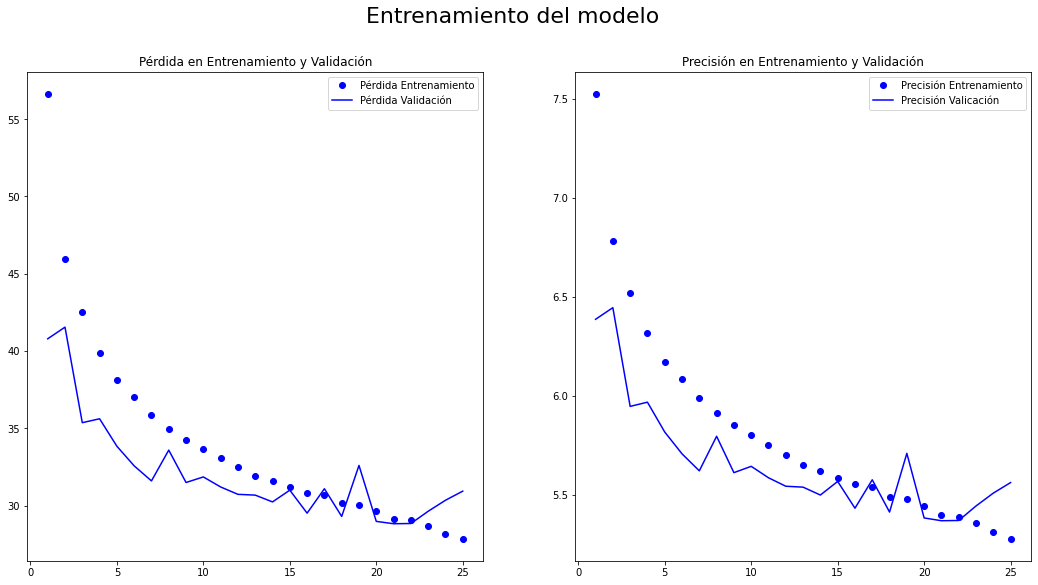

In [ ]:
# Graficamos la función de pérdida y la precisión de entrenamiento y validación
perdida = historial.history['mse']
validac_perdida = historial.history['val_mse']
epochs1 = range (1, len(perdida)+1)

precision = historial.history['rmse']
validac_precision = historial.history['val_rmse']
epochs2 = range (1, len(precision)+1)

plt.figure(figsize=(18,9)).suptitle("Entrenamiento del modelo",fontsize=22)
plt.subplot(1,2,1)
plt.plot(epochs1, perdida, 'bo' ,label='Pérdida Entrenamiento')
plt.plot(epochs1, validac_perdida, 'b', label='Pérdida Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs2, precision, 'bo', label='Precisión Entrenamiento')
plt.plot(epochs2, validac_precision, 'b', label='Precisión Valicación')
plt.title('Precisión en Entrenamiento y Validación')
plt.legend()
plt.show()